In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1831784845.npz
(300, 64, 64, 3)


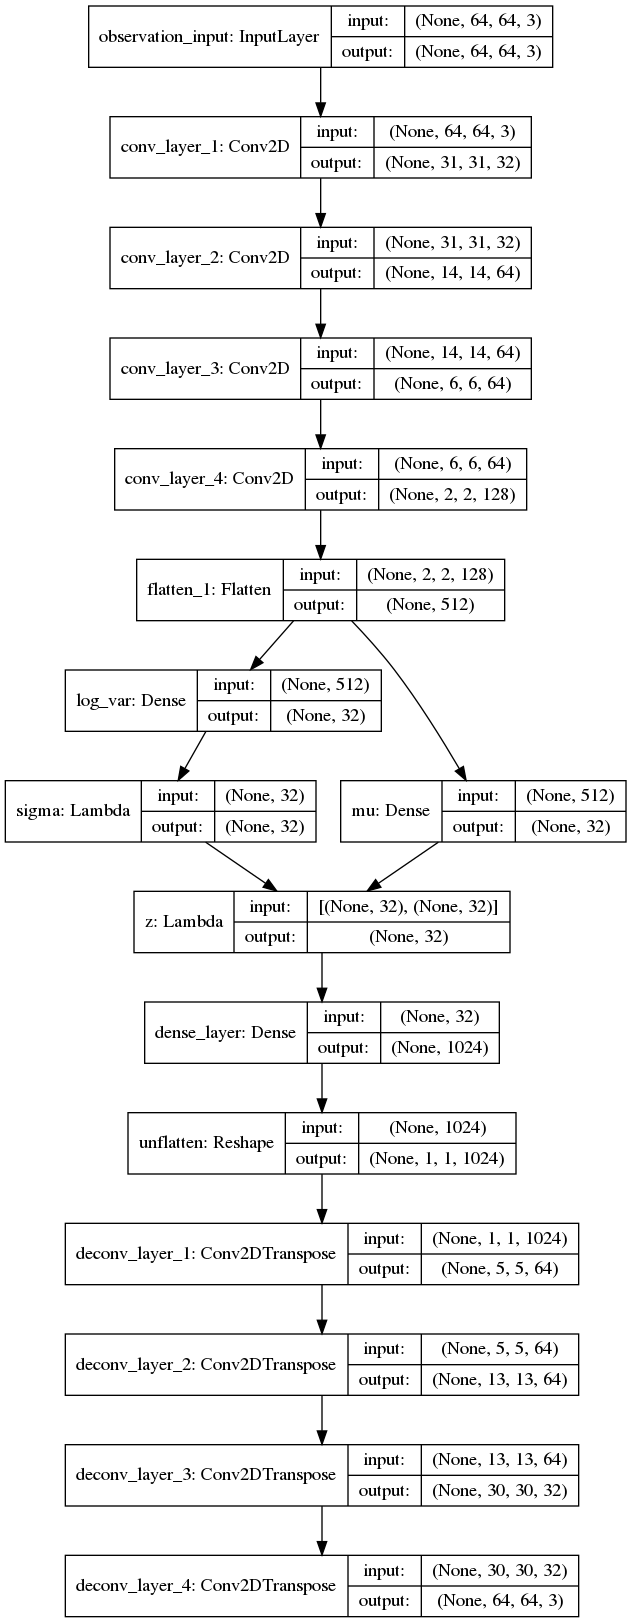

In [4]:

plot_model(vae.full_model, to_file='./vae/model.png', show_shapes=True)

In [13]:
!conda install imagemagick

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - imagemagick

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




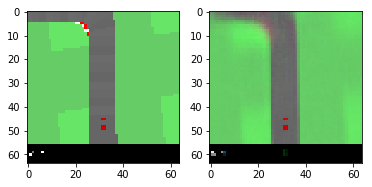

AttributeError: type object 'Image' has no attribute 'save'

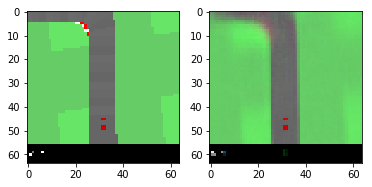

In [14]:
### output from one episode

from IPython.display import Image

giffy = []

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow(z_decoded)
    
#     plt.show()
    
    display.clear_output(wait=True)
    
    display.display(plt.gcf())
    giffy.append(plt.gcf())

Image.save('out.gif', save_all=True, append_images=giffy)
#Image(filename="./giphy.gif.png")

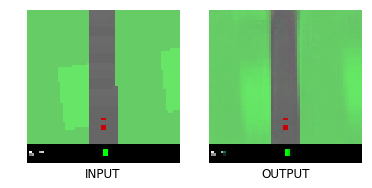

In [6]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [7]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.0302 -0.0345 -0.303   0.0401  1.0253  0.2098  0.0638  0.0022 -0.0303
  0.0409 -0.0595 -0.0058 -0.076   0.1028  1.0788  0.0278  0.0406 -0.0051
 -0.0711 -0.8865 -0.0306 -0.0188 -0.0043  0.0196  0.2467  0.0656  0.0189
  0.0371  0.0702 -0.071  -1.1827  0.0641]
log_var = [-0.0481 -0.0178 -5.9243 -0.0143 -3.8705 -3.0799  0.0183 -0.0267 -0.0234
 -0.0388 -0.0149 -0.0281  0.0153 -0.0502 -4.4186  0.0052 -0.0391 -0.035
 -0.0519 -5.0292  0.0045 -0.0358 -0.0063 -0.0178 -6.2071 -0.0385 -0.0007
  0.0072 -0.0234  0.0004 -5.7729 -0.1072]
z = [-1.4724 -1.3152 -0.2479  0.1617  1.0668  0.0803 -1.6085 -0.1581  1.7047
  0.0415  0.7322 -0.1777 -0.3417 -1.4788  1.0552  0.5115 -0.5432  1.4172
  0.2471 -0.801  -0.5654 -0.8791  0.664  -1.5523  0.2496 -0.3063  0.1854
  1.0421  0.1937  1.2113 -1.2009  0.2877]


informative dimensions:


array([ 2,  4,  5, 14, 19, 24, 30, 31])

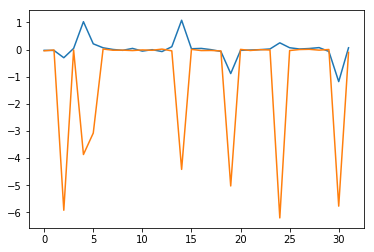

In [8]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.1)[0]
hot_zs

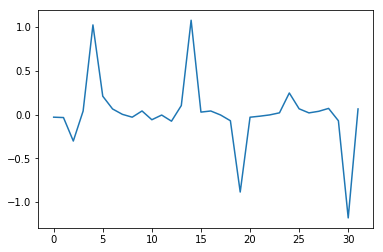

In [9]:
plt.plot(mu);

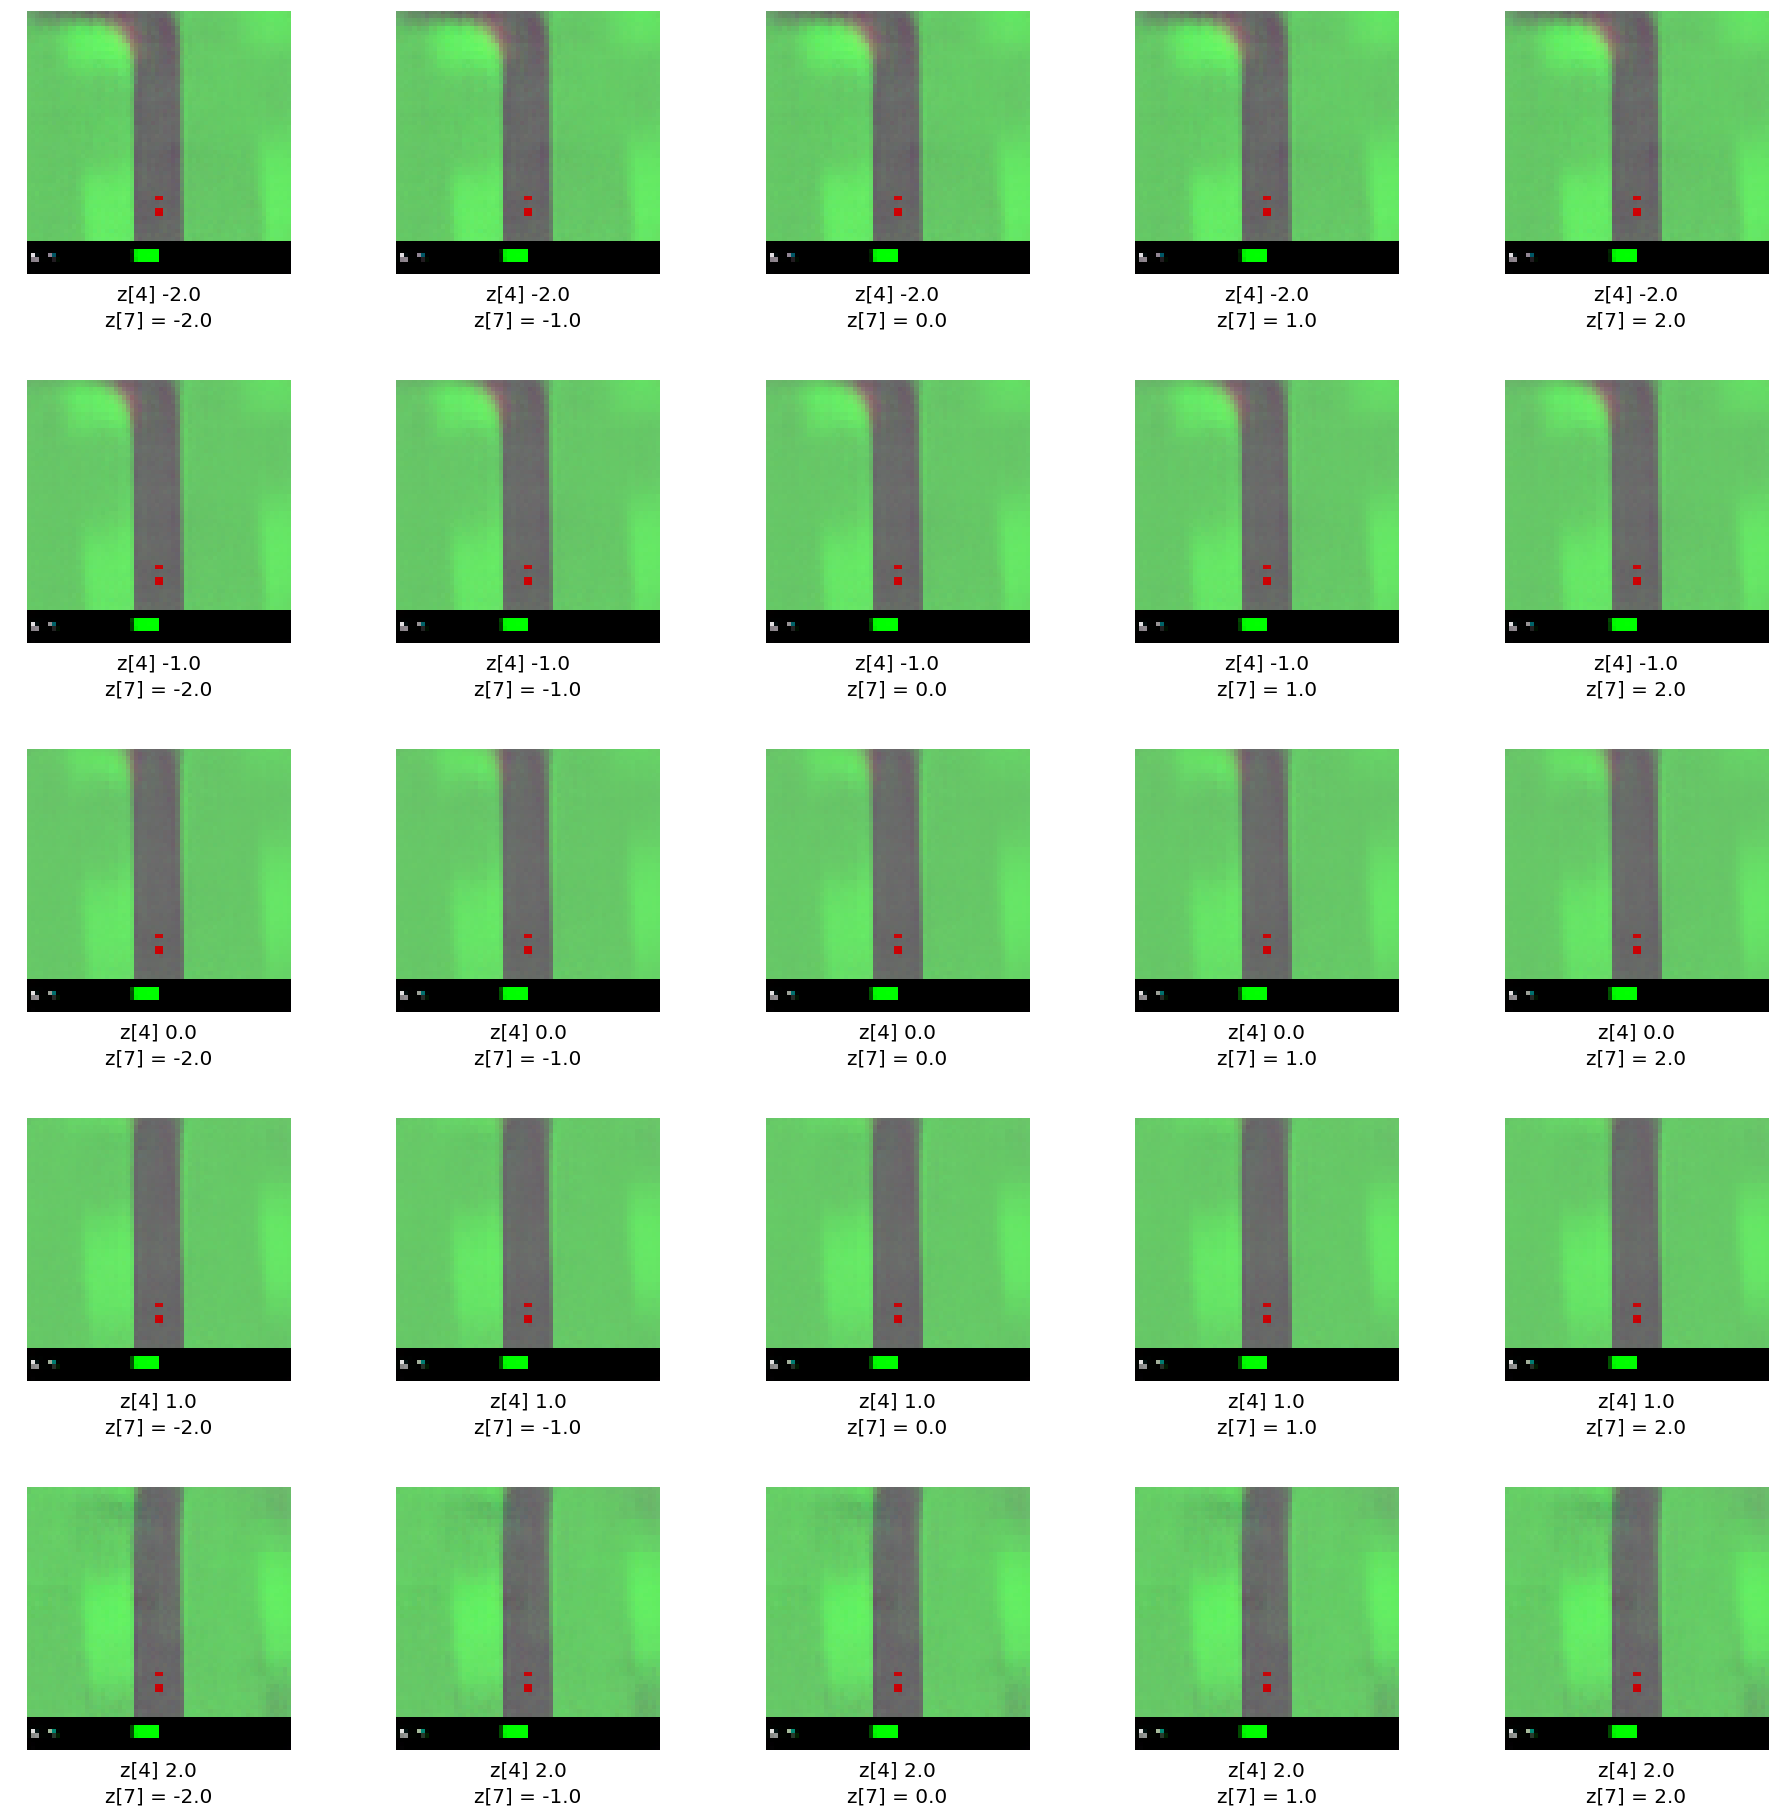

In [10]:
file1 = os.listdir(DIR_NAME)[200]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[260]
obs_data2 = np.load(DIR_NAME + file)['obs']

top_left = vae.encoder.predict(np.array([obs_data1[20]]))[0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[4] = (x-2)
        z[7] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[4] ' + str(np.round(z[4],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[7] = ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [11]:

def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-2.0700483322143555, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z>